# Solved Example- Polynomial Regression

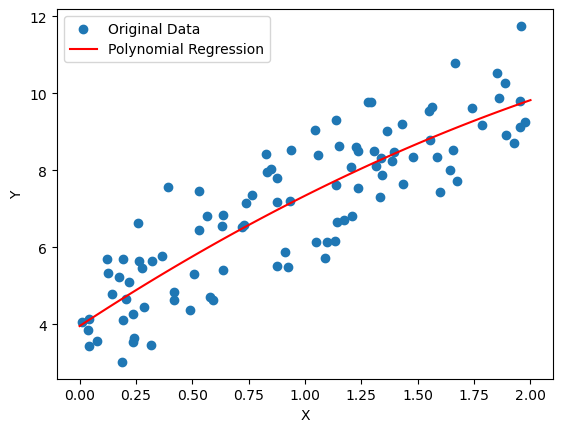

Coefficients:
[[ 0.          3.84100842 -0.45190593]]
Intercept:
[3.95139826]


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
# Fit a polynomial regression model
degree = 2 # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)# Make predictions
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
Y_new = model.predict(X_new_poly)
# Plot the original data and the polynomial regression curve
plt.scatter(X, Y, label='Original Data')
plt.plot(X_new, Y_new, 'r-', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

# Solved Example- Logistic Regression 

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



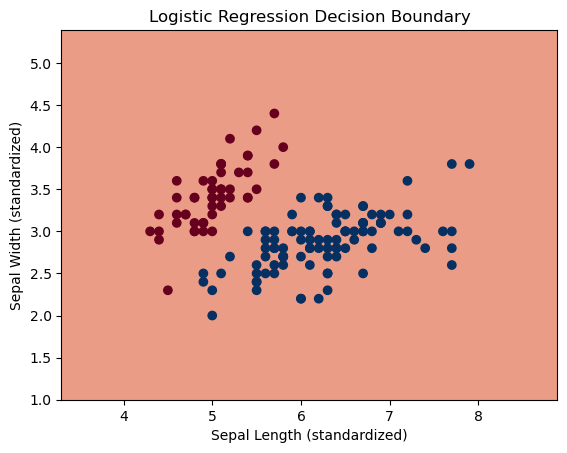

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Q1

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv("/home/student/Desktop/210962062/WEEK_5/gold_rate.csv")
df.head()

,Year,Price (24 karat per 10 grams)
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438


In [13]:
x = np.array(df['Year'].values).reshape(-1, 1)
y = np.array(df['Price (24 karat per 10 grams)'].values)
#Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

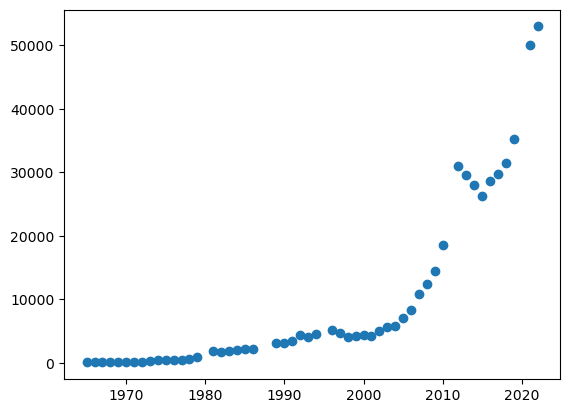

In [14]:
plt.scatter(x_train, y_train)

Polynomial Degree : 4
RMSE:  3958.5245524771944


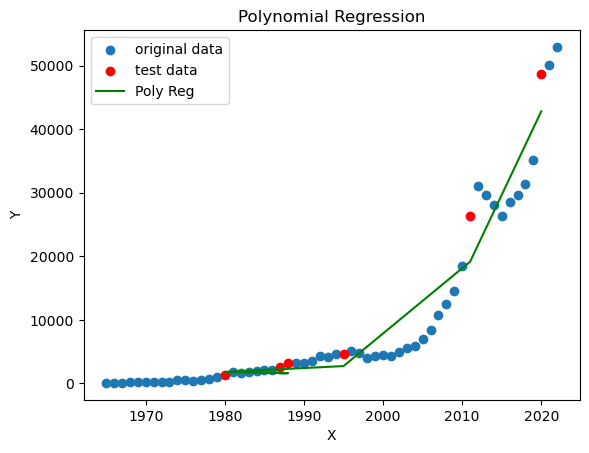

In [25]:
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 97057013.62274265, 0
for deg in degrees:
    poly_features = PolynomialFeatures(degree = deg)
    x = poly_features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x, y_train)
    
    x_new = poly_features.transform(x_test)
    y_pred = model.predict(x_new)
    
    rmse =math.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)
    if min_rmse>rmse:
        min_rmse = rmse
        min_deg = deg
        
print('Polynomial Degree :', min_deg)
print('RMSE: ', rmse)
plt.scatter(x_train, y_train, label='original data')
plt.scatter(x_test, y_test, label='test data', color='r')  # Plot the test data points in red
plt.plot(x_test, y_pred, 'g-', label='Poly Reg')  # Use x_test for plotting the regression line
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()

# Q2

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Accuracy: 0.5833333333333334
Confusion Matrix:
 [[0 5]
 [0 7]]


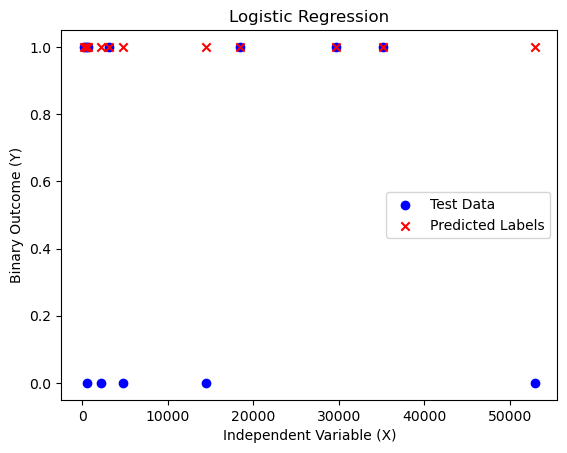

In [30]:
df = pd.read_csv("/home/student/Desktop/210962062/WEEK_5/gold_rate.csv")
X = df['Price (24 karat per 10 grams)'].values  # Independent variable
Y = df['status'].values

# Reshape the input array
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the data and the decision boundary
plt.scatter(X_test, Y_test, color='blue', label='Test Data')
plt.scatter(X_test, Y_pred, color='red', marker='x', label='Predicted Labels')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Binary Outcome (Y)')
plt.title('Logistic Regression')
plt.legend()
plt.show()



# Q3

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv("/home/student/Desktop/210962062/WEEK_5/silver_prices.csv")
X1 = df['gprice'].values
X2 = df['sprice'].values
Y = df['Year'].values
X = np.column_stack((X1, X2))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
degree = 2  # Degree of polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, Y_train)
Y_pred = model.predict(X_test_poly)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print('Predicted: ', Y_pred)

Mean Squared Error: 20.38516518531614
Predicted:  [1993.05732199 2009.10205815 2018.67190214 1992.69091744 2018.8805381
 1987.18249532 1992.98404974 1989.93215511 1994.67116409]


# Q4

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/home/student/Desktop/210962062/WEEK_5/silver_prices.csv")
X1 = df['gprice'].values
X2 = df['sprice'].values
Y = df['status'].values
X = np.column_stack((X1, X2))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 5]
 [1 3]]
